In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

In [15]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
X = iris.drop(columns=['species']) # Droppa la colonna "petal_width"
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y = iris["species"]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,
                                                    random_state=667
                                                    )

In [19]:
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
model.score(X_train, y_train)

1.0

In [22]:
model.score(X_test, y_test)

0.9473684210526315

In [30]:
model.predict_proba([[1.0, 0.3, 1.4, 2.1]])

c:\Users\barba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [47]:
res = model.predict([[1.0, 0.3, 1.4, 2.1]])
res[0]

c:\Users\barba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'setosa'

In [49]:
classes={0:"setosa",1:'virginica',2:'versicolor'}

In [50]:
y_pred = classes[res[0]]
y_pred

KeyError: 'setosa'

In [51]:
#cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=10)

array([0.91666667, 1.        , 1.        , 0.90909091, 1.        ,
       0.90909091, 0.81818182, 1.        , 1.        , 1.        ])

In [52]:
model.feature_importances_

array([0.        , 0.01786711, 0.54879489, 0.433338  ])

In [53]:
importance = model.feature_importances_

<BarContainer object of 4 artists>

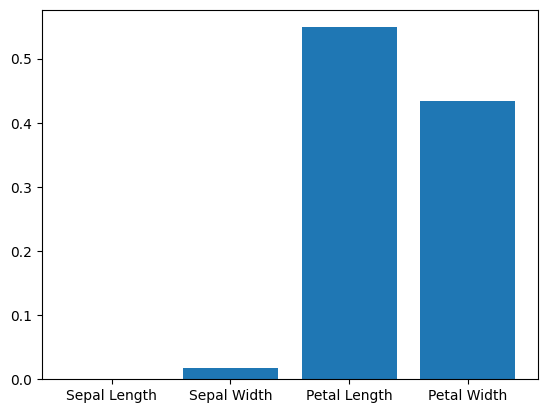

In [54]:
plt.bar(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'], importance)

In [55]:
!pip install graphviz -q



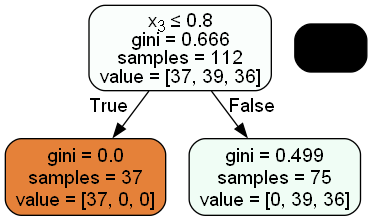

In [60]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

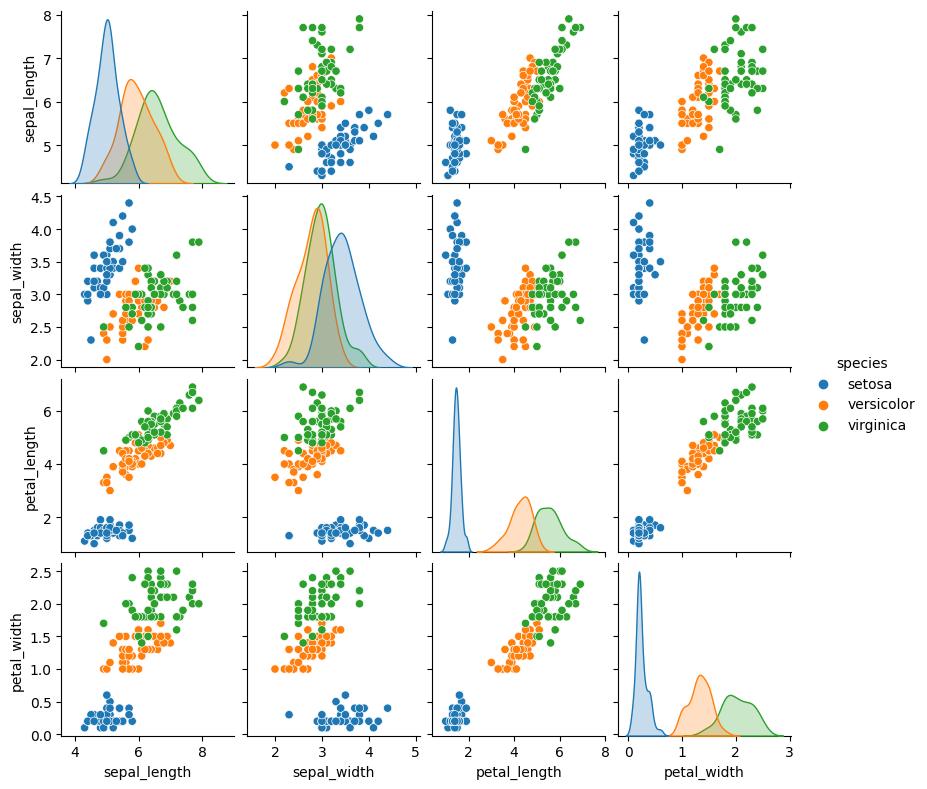

In [19]:
import seaborn as sns

iris = sns.load_dataset('iris')
sns.pairplot(data=iris, hue='species', height=2, aspect=1)

In [56]:
model = DecisionTreeClassifier(max_depth = 1).fit(X_train, y_train)

In [57]:
model.score(X_train, y_train)

0.6785714285714286

In [58]:
model.score(X_test, y_test)

0.631578947368421

In [59]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'StringIO' is not defined

In [24]:
model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)


In [25]:
model.score(X_train, y_train)

0.9642857142857143

In [26]:
model.score(X_test, y_test)

0.9473684210526315

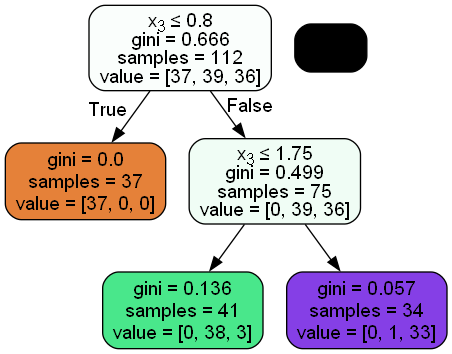

In [27]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [28]:
model = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)
model.score(X_train, y_train)

0.9732142857142857

In [29]:
model.score(X_test, y_test)

0.9736842105263158

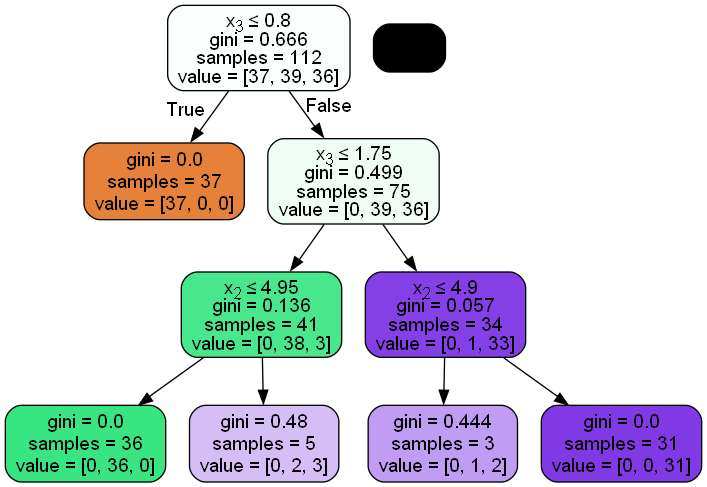

In [30]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

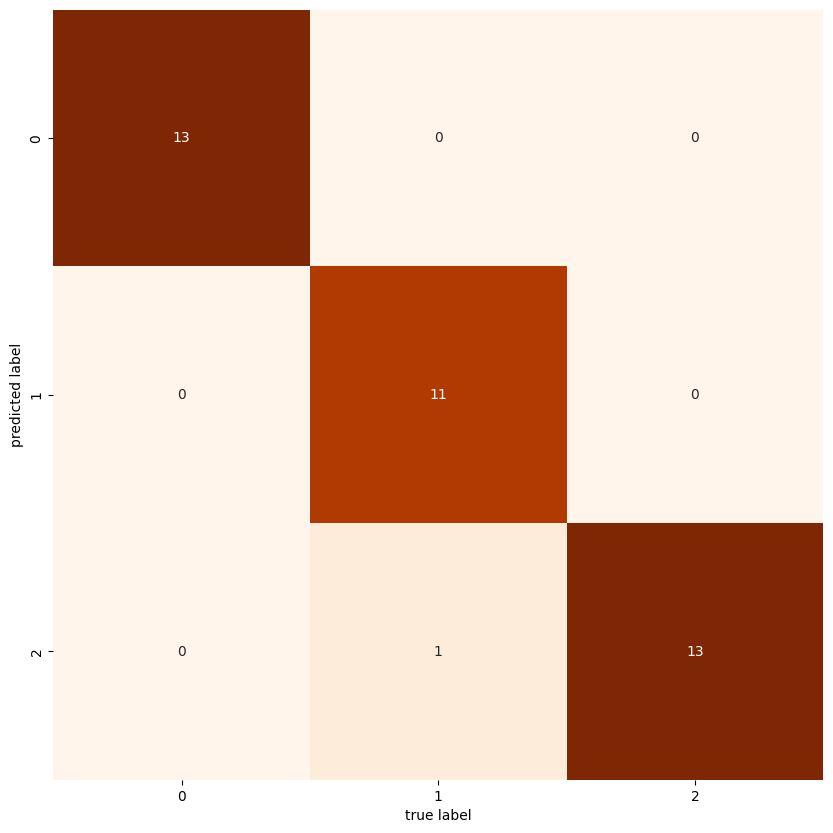

In [31]:
from sklearn.metrics import confusion_matrix

predictions=model.predict(X_test)

mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(18,10))
sns.heatmap(mat, square=True, annot=True, cbar=False,cmap='Oranges')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [32]:
import sklearn
sklearn.metrics.confusion_matrix(y_test, predictions)

array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 13]], dtype=int64)

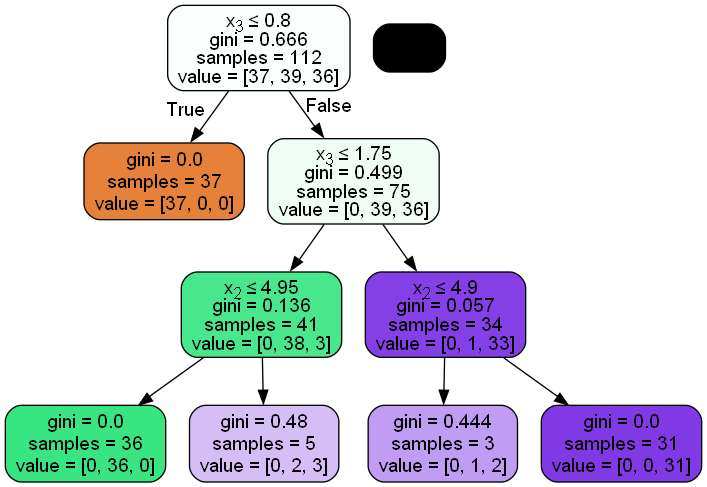

In [33]:
dot_data2 = StringIO()
export_graphviz(model, out_file=dot_data2,  
                filled=True, rounded=True,
                special_characters=True)
graph2 = pydotplus.graph_from_dot_data(dot_data2.getvalue())  
Image(graph2.create_png())

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9736842105263158

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        11
           2       1.00      0.93      0.96        14

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

